# 2일차 – 회귀 알고리즘 심화 강의

---

## 1. 선형 회귀 vs 다항 회귀

- **선형 회귀 (Linear Regression)**  
  - 가정: y = w₀ + w₁x₁ + … + wₚxₚ  
  - Closed-form(OLS) 또는 경사하강법 사용  
- **다항 회귀 (Polynomial Regression)**  
  - 특성 확장: x², x³ … → 비선형 관계 모델링  
  - degree 조절로 모델 복잡도 조정  

---
## 경사하강법(Gradient Descent) 쉽게 이해하기

---

### 1. 무엇을 하는 알고리즘인가?
- **목적**: 손실 함수(loss function)를 **최솟값**으로 만드는 파라미터(모델 가중치)를 찾아가는 최적화 방법  
- **핵심 아이디어**: “내리막길을 따라 내려가라”  
  1. 현재 위치(파라미터)에서 **기울기(경사)**를 계산  
  2. 기울기가 가리키는 방향의 **반대 방향**으로 일정량 이동  
  3. 손실이 더 작아지면 이동을 계속, 더 이상 줄어들지 않을 때까지 반복

---

### 2. 직관적 예시: 산 언덕 비유
- **산 꼭대기**에 공을 올려두면, **경사**를 따라 공이 아래로 굴러떨어지듯  
- 손실 함수의 **최솟값 지점**(골짜기)까지 반복해서 한 걸음씩 이동  

---

### 3. 수식
- 파라미터 \(w\)를 업데이트 하는 일반적 식:
  \[
    w \leftarrow w - \alpha \, \frac{\partial L(w)}{\partial w}
  \]
  - \(L(w)\): 손실 함수  
  - \(\frac{\partial L}{\partial w}\): 손실 함수의 기울기(미분)  
  - \(\alpha\) (학습률, learning rate): 한 번에 움직이는 **스텝 크기**

---

## 2. 과대적합 vs 과소적합

- **과소적합 (Underfitting)**  
  - 모델 복잡도 부족 → 학습·테스트 MSE 모두 높음  
- **과대적합 (Overfitting)**  
  - 모델 복잡도 과다 → 학습 MSE 낮음, 테스트 MSE 높음  

---

## 3. 보강 주제

1. **정규화 (Regularization)**  
   - Ridge (L₂), Lasso (L₁)  
   - 과대적합 완화  
2. **교차검증 (Cross-Validation)**  
   - K-Fold, GridSearchCV  
   - 하이퍼파라미터 검증  
3. **모델 평가 지표**  
   - 회귀: MSE, MAE, R²  
4. **학습 곡선 (Learning Curve)**  
   - 데이터 양 대 성능 변화 시각화  


In [ ]:
# 의사코드 (Pseudo-code)
w = 4.0
alpha = 0.1
for i in range(20):
    grad = 2 * w             # f'(w) = 2w
    w = w - alpha * grad     # 경사하강법 업데이트
    print(f"step {i}: w = {w:.4f}, f(w)={w**2:.4f}")

step 0: w = 3.2000, f(w)=10.2400
step 1: w = 2.5600, f(w)=6.5536
step 2: w = 2.0480, f(w)=4.1943
step 3: w = 1.6384, f(w)=2.6844
step 4: w = 1.3107, f(w)=1.7180
step 5: w = 1.0486, f(w)=1.0995
step 6: w = 0.8389, f(w)=0.7037
step 7: w = 0.6711, f(w)=0.4504
step 8: w = 0.5369, f(w)=0.2882
step 9: w = 0.4295, f(w)=0.1845
step 10: w = 0.3436, f(w)=0.1181
step 11: w = 0.2749, f(w)=0.0756
step 12: w = 0.2199, f(w)=0.0484
step 13: w = 0.1759, f(w)=0.0309
step 14: w = 0.1407, f(w)=0.0198
step 15: w = 0.1126, f(w)=0.0127
step 16: w = 0.0901, f(w)=0.0081
step 17: w = 0.0721, f(w)=0.0052
step 18: w = 0.0576, f(w)=0.0033
step 19: w = 0.0461, f(w)=0.0021


5. 학습률 선택의 중요성
* 너무 크면: 골짜기를 “건너뛰며” 발산

* 너무 작으면: 수렴 속도가 느림

6. 변형된 알고리즘
* 확률적 경사하강법 (SGD): 매 스텝마다 전체 데이터가 아니라 한 개(또는 일부) 샘플으로 기울기 계산 → 속도·일반화 향상

* 모멘텀, Adam 등: 과거 기울기를 누적·조정하여 더 빠르고 안정적 수렴

# 확률적 경사하강법 + Momentum & Adam 쉽게 이해하기

---

## 1. 기본 SGD (Stochastic Gradient Descent)

- **아이디어**: 전체 데이터를 쓰지 않고, 매번 일부(또는 한 샘플)만 골라  
  → 기울기를 구하고  
  → 그 반대 방향으로 “한 걸음” 이동  
- **비유**:  
  - 폭 넓은 숲길을 걸을 때, 매번 주변 몇 걸음만 살짝 살피고 내려가기  

---

## 2. Momentum

- **핵심**: “관성”을 추가  
- **어떻게?**  
  1. 지금 이동할 방향(기울기)뿐 아니라  
  2. **바로 전** 내가 움직였던 방향도 기억  
  3. 두 방향을 섞어서 이동  
- **비유**:  
  - 공을 언덕 위에 놓으면, 언덕 아래로 굴러가다 한 번에 너무 급격히 흔들리지 않고  
  - 관성으로 쭉 밀려 내려가듯  
- **효과**:  
  - 울퉁불퉁한 기울기에도 **덜 흔들리고**  
  - 평탄한 방향으로는 **더 빨리** 내려감  

---

## 3. Adam

- **핵심**: 크게 **두 가지 장점** 결합  
  1. **Momentum**처럼 “방향 기억”  
  2. **학습률 자동 조정**(RMSProp 같은 아이디어)  
- **어떻게?**  
  - “얼마나 급하게 내려왔는지” 기록 →  
  - 너무 튀는 방향엔 **학습을 천천히**,  
  - 완만한 방향엔 **학습을 빠르게**  
- **비유**:  
  - 등산할 때  
    - 발걸음이 가팔랐던 길은 천천히,  
    - 완만했던 길은 빠르게 걷도록  
    - 또한, “최근 걸음 방향”도 기억해  
- **효과**:  
  - **탄력적** 이동 → 초반 빠른 적응  
  - 파라미터별로 “다르게” 배우기  

---

## 4. 요약 비교

| 특징            | SGD       | SGD + Momentum              | Adam                          |
|---------------|----------|-----------------------------|-------------------------------|
| 이동 방향 기억   | ×        | ○ (바로 전 방향 기억)         | ○ (바로 전 방향 기억)          |
| 학습률 조정      | 고정      | 고정                         | ○ (자동)                      |
| 진동 억제       | ×        | ○                            | ○                            |
| 수렴 속도       | 느림      | 빠름                         | 빠르고 안정적                 |

---

> **직관 팁**:  
> - **Momentum**은 “방향을 부드럽게”  
> - **Adam**은 “방향 + 속도(학습 속도)를 똑똑하게” 조절합니다  


# 2일차 – 회귀 알고리즘 심화: 다항 회귀 vs 다중 회귀

---

## 1. 개념 정리

- **다항 회귀 (Polynomial Regression)**  
  - **목적**: 비선형 관계를 선형 모델로 잡아내기 위해, 원본 특성을 거듭제곱/교호항으로 확장  

- **다중 회귀 (Multiple Linear Regression)**  
  - **목적**: 여러 개의 독립 변수(X₁, X₂, …, Xₚ)가 종속 변수(y)에 미치는 영향을 동시에 모델링  


---

## 2. 보강 주제

1. **특성 스케일링**  
   - 다항 거듭제곱 항은 값 범위 급증 → `StandardScaler` 등 선처리 필요  
2. **과적합 위험**  
   - 고차 다항(d≫) 시 **학습 MSE↓, 테스트 MSE↑**  
   - 해결: 정규화(Ridge, Lasso)  
3. **더미 인코딩 (Dummy Encoding)**  
   - 범주형 변수를 다중 회귀에 포함할 때 필요  
4. **교차 검증 & 그리드 서치**  
   - polynomial degree & regularization strength 튜닝

---

Poly R²: 0.9856163630950934


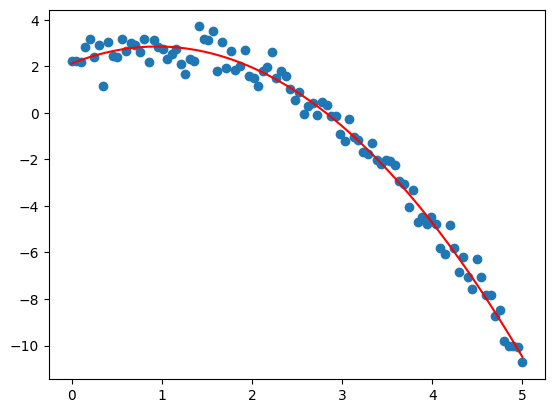

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import matplotlib.pyplot as plt

# **다항 회귀 (Polynomial Regression)**
X = np.linspace(0,5,100)[:,None]
y = 2 + 1.5*X.ravel() - 0.8*X.ravel()**2 + 0.5*np.random.randn(100)
plt.scatter(X,y)
#Xp = PolynomialFeatures().fit_transform(X)
m = LinearRegression().fit(Xp, y)
plt.plot(X, m.predict(Xp), c='r')
print("Poly R²:", m.score(Xp, y))

In [14]:
X_mul = np.random.randn(200,3)
y_mul = 1 + X_mul.dot([2,-3,0.5]) + 0.3*np.random.randn(200)
Xt, Xv, yt, yv = train_test_split(X_mul, y_mul, test_size=0.3, random_state=1)
Xt_s = StandardScaler().fit_transform(Xt)
m2 = LinearRegression().fit(Xt_s, yt)
print("Mult R²:", m2.score(StandardScaler().fit_transform(Xv), yv))

Mult R²: 0.982619802056497


# Ridge & Lasso 회귀 심화

---

## 1. 개념

- **Ridge 회귀 (L₂ 정규화)**  
  - 손실 함수에 계수 제곱합 패널티 추가  
  - 과적합 줄이기 위해 큰 계수 값 억제  

- **Lasso 회귀 (L₁ 정규화)**  
  - 손실 함수에 계수 절댓값 합 패널티 추가  
  - 일부 계수를 0으로 만들어 **특성 선택** 효과  

---

## 2. 하이퍼파라미터

- **alpha (규제 강도)**  
  - **작을수록** 일반 선형회귀에 가까움 (패널티 약함)  
  - **클수록** 계수 더 작게(또는 0으로) → 단순 모델

---

## 3. 장단점

|               | Ridge                                 | Lasso                                  |
|---------------|---------------------------------------|----------------------------------------|
| 장점          | 모든 특성 사용, 과대적합 완화         | 특성 선택 기능, 단순 모델              |
| 단점          | 계수를 0으로 만들지 못함              | 강한 규제 시 중요한 특성까지 제거될 수 있음 |

---

## 4. 보강 주제

1. **교차검증을 통한 α 탐색** (`GridSearchCV`)  
2. **계수 경로(Coef Path)**: α 변화에 따른 계수 궤적 시각화  
3. **표준화 필수**: `StandardScaler`  
4. **ElasticNet**: L₁ + L₂ 혼합 규제  
5. **좌표 하강법(Coordinate Descent)**: Lasso 최적화 알고리즘  



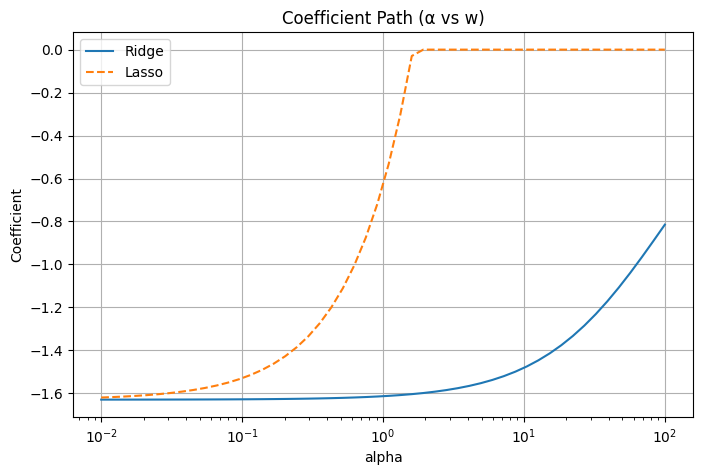

Ridge R² (test): 0.38998770266324767
Lasso R² (test): 0.1559773449588323


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1) 데이터 생성 (다항 관계 + 잡음)
np.random.seed(0)
X = np.sort(np.random.rand(100,1)*10, axis=0)
y = 1.5*X.ravel() - 0.2*X.ravel()**2 + np.random.randn(100)*2

# 2) 스케일링
X_s = StandardScaler().fit_transform(X)

# 3) alpha별 계수 경로 비교
alphas = np.logspace(-2, 2, 50)
coefs_ridge = []
coefs_lasso = []
for a in alphas:
    coefs_ridge.append(Ridge(alpha=a).fit(X_s, y).coef_[0])
    coefs_lasso.append(Lasso(alpha=a, max_iter=5000).fit(X_s, y).coef_[0])

plt.figure(figsize=(8,5))
plt.plot(alphas, coefs_ridge, label='Ridge', linestyle='-')
plt.plot(alphas, coefs_lasso, label='Lasso', linestyle='--')
plt.xscale('log')
plt.xlabel('alpha'); plt.ylabel('Coefficient')
plt.title('Coefficient Path (α vs w)')
plt.legend(); plt.grid(True)
plt.show()

# 4) 모델 평가 예제
X_tr, X_te, y_tr, y_te = train_test_split(X_s, y, test_size=0.3, random_state=1)
for Model, name in [(Ridge, 'Ridge'), (Lasso, 'Lasso')]:
    m = Model(alpha=1.0, max_iter=5000).fit(X_tr, y_tr)
    print(f"{name} R² (test):", m.score(X_te, y_te))


## 실습 과제

1. **α 탐색**  
   - Ridge/Lasso 각각 α ∈ [0.01,0.1,1,10,100] 실험 → 테스트 R² 비교  

2. **GridSearchCV 활용**  
   - `param_grid={'alpha':[0.01,0.1,1,10,100]}`로 최적 α 찾기  

3. **ElasticNet 적용**  
   - `ElasticNet(l1_ratio=0.5, alpha=1)` 사용해 보고 R² 확인  

4. **계수 경로 해석**  
   - α 증가 시 Ridge는 계수가 작아지지만 0 근처 유지, Lasso는 **0**으로 수렴함을 확인  

5. **좌표 하강법**  
   - Lasso에서 `max_iter`를 줄여보거나 `tol` 변경해 수렴 속도 관찰  


In [17]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import numpy as np

# 1) α 탐색
for a in [0.01,0.1,1,10,100]:
    for Model,name in [(Ridge,'Ridge'),(Lasso,'Lasso')]:
        m = Model(alpha=a, max_iter=5000).fit(X_tr, y_tr)
        print(f"{name} α={a}: R²={m.score(X_te,y_te):.3f}")
print()

# 2) GridSearchCV
grid = GridSearchCV(Ridge(), {'alpha':[0.01,0.1,1,10,100]}, cv=5)
grid.fit(X_s, y)
print("Best Ridge α:", grid.best_params_['alpha'])

# 3) ElasticNet
m_el = ElasticNet(alpha=1, l1_ratio=0.5, max_iter=5000).fit(X_tr, y_tr)
print("ElasticNet R²:", m_el.score(X_te, y_te))

# 4) 좌표 하강법 수렴 실험
for tol in [1e-4,1e-2,1e-1]:
    m = Lasso(alpha=1, tol=tol, max_iter=100).fit(X_s, y)
    print(f"Lasso tol={tol}: coeff={m.coef_[0]:.3f}")

Ridge α=0.01: R²=0.393
Lasso α=0.01: R²=0.391
Ridge α=0.1: R²=0.393
Lasso α=0.1: R²=0.377
Ridge α=1: R²=0.390
Lasso α=1: R²=0.156
Ridge α=10: R²=0.364
Lasso α=10: R²=-0.003
Ridge α=100: R²=0.207
Lasso α=100: R²=-0.003

Best Ridge α: 100
ElasticNet R²: 0.21553340409301514
Lasso tol=0.0001: coeff=-0.629
Lasso tol=0.01: coeff=-0.629
Lasso tol=0.1: coeff=-0.629


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split

# 기존에 생성된 X, y 데이터 사용
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Ridge 회귀 파이프라인 + GridSearch
pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
param_ridge = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(
    pipe_ridge, param_ridge, cv=5, scoring='neg_mean_squared_error'
)
grid_ridge.fit(X_train, y_train)
print("Ridge Best α:", grid_ridge.best_params_['ridge__alpha'])
print("Ridge CV MSE:", -grid_ridge.best_score_)
print("Ridge Test R²:", grid_ridge.score(X_test, y_test))

# Lasso 회귀 파이프라인 + GridSearch
pipe_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=5000))
])
param_lasso = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_lasso = GridSearchCV(
    pipe_lasso, param_lasso, cv=5, scoring='neg_mean_squared_error'
)
grid_lasso.fit(X_train, y_train)
print("Lasso Best α:", grid_lasso.best_params_['lasso__alpha'])
print("Lasso CV MSE:", -grid_lasso.best_score_)
print("Lasso Test R²:", grid_lasso.score(X_test, y_test))


Ridge Best α: 10
Ridge CV MSE: 7.312557477600272
Ridge Test R²: -5.4606823248627
Lasso Best α: 0.1
Lasso CV MSE: 7.350990640399918
Lasso Test R²: -5.546816649415015


In [19]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1) 데이터 생성
X, y = make_regression(
    n_samples=200, n_features=10, n_informative=5,
    noise=10, random_state=1
)

# 2) 학습/테스트 분할 및 스케일링
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_tr_s = scaler.fit_transform(X_tr)
X_te_s = scaler.transform(X_te)

# 3) ElasticNet 모델 학습
model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=0)
model.fit(X_tr_s, y_tr)

# 4) 예측 및 평가
y_pred = model.predict(X_te_s)
print("R²:", r2_score(y_te, y_pred))
print("MSE:", mean_squared_error(y_te, y_pred))
print("Non-zero coefficients:", np.sum(model.coef_ != 0))
print("Coefficients:", model.coef_)


R²: 0.8520771874288666
MSE: 2859.1401767340935
Non-zero coefficients: 9
Coefficients: [ 3.17870163e-01  0.00000000e+00  6.07496445e+00  6.20029722e+01
  4.92169828e+01  1.74013064e+00 -6.99830562e+00  2.07644402e-02
  5.58648303e+01  1.29606361e+00]


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# 1) 데이터 로드
df = pd.read_csv('manhattan.csv')
X = df.drop(columns=['price'])
y = df['price']

# 2) train/test 분할
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)

# 3) 파이프라인 정의
models = {
    'Linear': Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())]),
    'Poly2': Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('lr', LinearRegression())
    ]),
    'Ridge': Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]),
    'Lasso': Pipeline([('scaler', StandardScaler()), ('lasso', Lasso(max_iter=5000))]),
    'ElasticNet': Pipeline([('scaler', StandardScaler()), ('en', ElasticNet(max_iter=5000))])
}

# 4) 하이퍼파라미터 그리드
param_grids = {
    'Ridge': {'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
    'Lasso': {'lasso__alpha': [0.001, 0.01, 0.1, 1]},
    'ElasticNet': {
        'en__alpha': [0.01, 0.1, 1],
        'en__l1_ratio': [0.3, 0.5, 0.7]
    }
}

# 5) 모델 학습 및 평가
results = {}
for name, pipe in models.items():
    if name in param_grids:
        gs = GridSearchCV(pipe, param_grids[name], cv=5, scoring='neg_mean_squared_error')
        gs.fit(X_tr, y_tr)
        model = gs.best_estimator_
    else:
        model = pipe.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    results[name] = {
        'R2': r2_score(y_te, preds),
        'MSE': mean_squared_error(y_te, preds)
    }

# 6) 결과 출력
from pprint import pprint
pprint(results)


{'ElasticNet': {'MSE': 202365.8471602798, 'R2': -0.0218201690754094},
 'Lasso': {'MSE': 210175.12575214554, 'R2': -0.061252111189520564},
 'Linear': {'MSE': 210473.8819667107, 'R2': -0.06276064205064702},
 'Poly2': {'MSE': 268400.3525853689, 'R2': -0.3552528626110585},
 'Ridge': {'MSE': 202329.47505393066, 'R2': -0.021636512829156018}}
